First Analyze the csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set (style="whitegrid")

In [ ]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.duplicated().sum()

0

------------------------------------------------------------------------------------------
check count of non-fraud vc fraud transactions


In [9]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

------------------------------------------------------------------------------------------
%  of transaction that are fraud

In [10]:
round((df['isFraud'].value_counts()[1] / df.shape[0])*100,2)

np.float64(0.13)

-----------------------------------------------------------------------------------------
Check count of each transaction type

<function matplotlib.pyplot.show(close=None, block=None)>

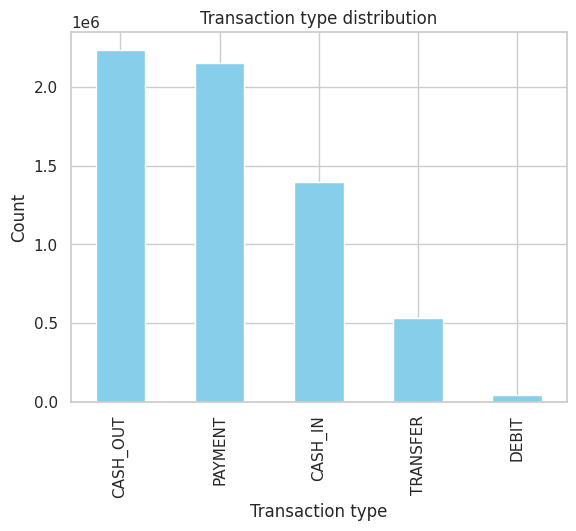

In [9]:
df["type"].value_counts().plot(kind='bar',title='Transaction type distribution', color=['skyblue'])
plt.xlabel('Transaction type')
plt.ylabel('Count')
plt.show

-------------------------------------------------------------------------------------------
fraud rate by transaction type

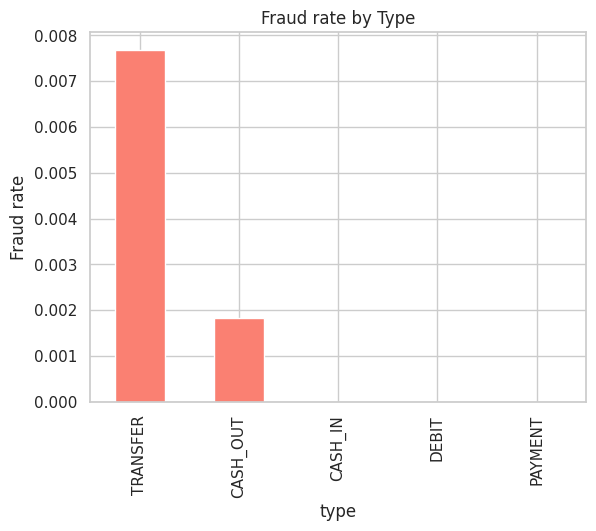

In [10]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud rate by Type",color="salmon")
plt.ylabel("Fraud rate")
plt.show()
                                                                 

In [13]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

-------------------------------------------------------------------------------------------
log distribution of amt

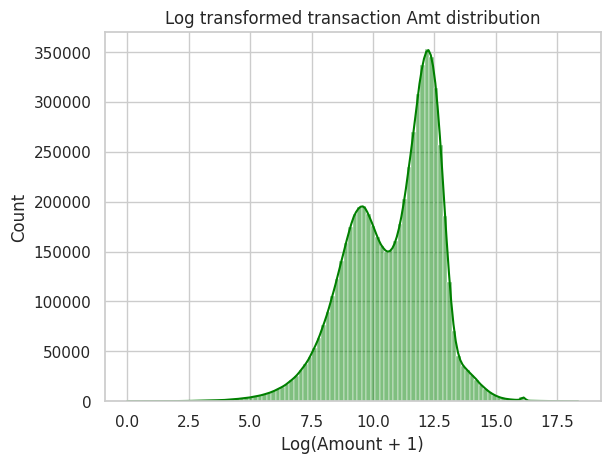

In [12]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color='green')
plt.title('Log transformed transaction Amt distribution')
plt.xlabel('Log(Amount + 1)')
#plt.ylabel('Frequency')
plt.show()

--------------------------------------------------------------------------------------------
compares box plot amt distributions for fraud vs non-fraud on transactions under 50k

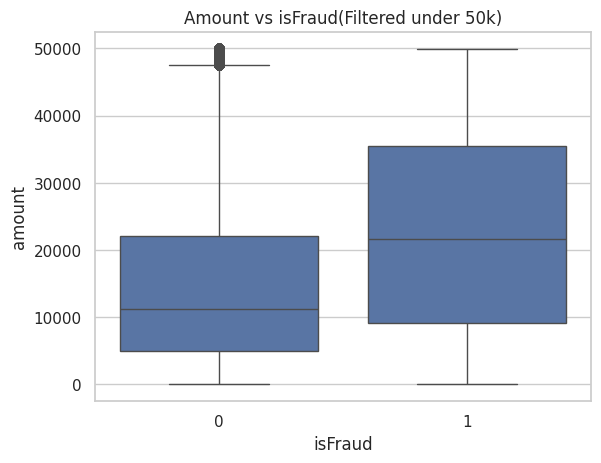

In [14]:
sns.boxplot(data=df[df["amount"] < 50000], x='isFraud', y='amount')
plt.title('Amount vs isFraud(Filtered under 50k)')
plt.show()

In [13]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

-----------------------------------------------------------------------------------------
### Feature Engg:- Balance difference
##### 1. we create new column by the name 'balanceDiffOrig' for showing difference between origanla acc balance before & after transaction
##### 2. we create new column by the name 'balanceDiffDest' which will help to understand destination balance should increase after receiving money

In [15]:
df["balanceDiffOrig"] = df['oldbalanceOrg'] - df["newbalanceOrig"]
df["balanceDiffDest"] = df['newbalanceDest'] - df["oldbalanceDest"]

In [17]:
(df["balanceDiffOrig"]<0).sum()

np.int64(1399253)

In [18]:
(df["balanceDiffDest"]<0).sum()

np.int64(1238864)

In [19]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


------------------------------------------------------------------------------------------
how many fraud events occur over the time

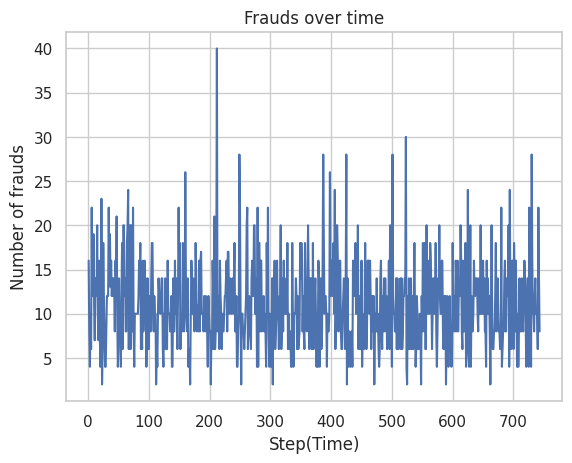

In [16]:
frauds_per_step= df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label='Frauds per Step')
plt.xlabel('Step(Time)')
plt.ylabel('Number of frauds')
plt.title('Frauds over time')
plt.grid(True)
plt.show()


In [20]:
df.drop(columns="step",inplace=True)                       #column not needed

In [28]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


-------------------------------------------------------------------------------------------
top 10 origin accounts by number of transactions.

In [29]:
top_senders = df['nameOrig'].value_counts().head(10)

In [30]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

---------------------------------------------------------------------------------------------
top 10 destination accounts by transactions.

In [31]:
top_receivers = df['nameDest'].value_counts().head(10)

In [32]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

--------------------------------------------------------------------------------------------
origin accounts with the most fraud occurrences.

In [35]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [36]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
Name: count, dtype: int64

------------------------------------------------------------------------------------------
selects only TRANSFER and CASH_OUT transactions bacause its more fraud prone

In [40]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [41]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

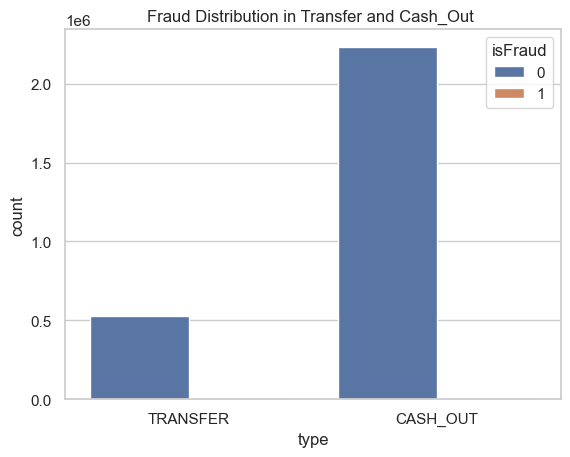

In [42]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title('Fraud Distribution in Transfer and Cash_Out ')
plt.show()

In [47]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [48]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


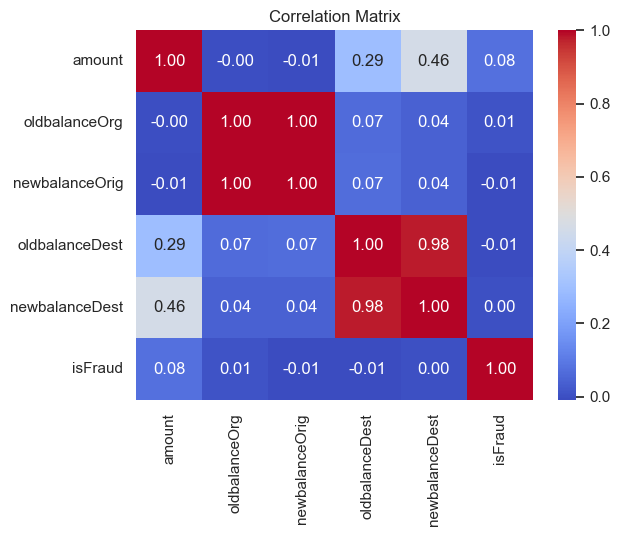

In [49]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [50]:
zero_after_transfer=df[
    (df["oldbalanceOrg"]> 0) & 
    (df["newbalanceOrig"] == 0) & 
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [51]:
len(zero_after_transfer)

1188074

In [52]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [53]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

-------------------------------------------------------------------------------------------
### Training the Models 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [21]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [24]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis =1)    # Dropping unnecessary columns that not  needed for model training

In [25]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [26]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [59]:
y= df_model["isFraud"]
X= df_model.drop("isFraud", axis=1) 

------------------------------------------------------------------------------------------
train test split in 7:3 ratio

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

-----------------------------------------------------------------------------------------
ColumnTransformer is helps you apply different preprocessing steps to different columns of your dataset at the same time.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),                     #standardizes numeric features (mean 0, std 1)
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder='drop'
)


----------------------------------------------------------------------------------------------
Train model

1 Logistic Regression

In [62]:
Pipeline=Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [63]:
Pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [64]:
y_pred = Pipeline.predict(X_test)

In [65]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [67]:
confusion_matrix(y_test, y_pred)

array([[1804823,  101499],
       [    151,    2313]])

In [69]:
Pipeline.score(X_test, y_test)*100

94.67462565211606

------------------------------------------------------------------------------------------
Train Model using

2 Gradient Boosting

In [76]:
from sklearn.pipeline import Pipeline


In [77]:
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

In [78]:
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [79]:
y_pred_gb = gb_pipeline.predict(X_test)



In [80]:
y_pred_gb

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [82]:
gb_pipeline.score(X_test, y_test)*100

99.90381320902395

----------------------------------------------------------------------------------------
1] Describe your fraud detection model in elaboration

I built a fraud detection model using machine learning. I tried logistic regression, Random Forest(not implimented because it took more time), and gradient boosting. Out of these, Gradient Boosting worked the best with an accuracy of 99.9%.

The steps i followed:

first, I cleaned the data (removed unwanted cloumns, checked missing values) then, i split it into training and testing sets.

I used a ColumnTransformer to scale numeric features and one-hot encode categorical features.

Used logistic regression 1st to train model and give 94 % accuracy , although its good but i tried random forest also but it took to much time as our dataset it to big , so i switch to gradient boosting as its better over both of them and also took less time than random forest.

-----------------------------------------------------------------------------------------
2] How did you select variables to be included in the model?

Variables were selected by:

i) Removing irrelevant columns (i removed  ID).

ii) Keeping features important for fraud (amount).

iv) Checking feature importance from the model.

-------------------------------------------------------------------------------------------
3] Demonstrate the performance of the model by using best set of tools.

i) Confusion Matrix 

ii) Precision & Recall

iii) F1 Score 

iv) ROC Curve & AUC (Area Under Curve) 


------------------------------------------------------------------------------------------
4] What are the key factors that predict fraudulent customer?

i used this columns to predict fraudulent customers:

i) amount – transaction amount

ii) oldbalanceOrg – sender’s balance before the transaction

iii) newbalanceOrig – sender’s balance after the transaction

iv) oldbalanceDest – receiver’s balance before the transaction

v) newbalanceDest – receiver’s balance after the transaction

vi) type – type of transaction (transfer, cash-out, etc.)



-----------------------------------------------------------------------------------------
5] Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense in predicting fraudulent customers because they directly capture unusual patterns in transactions. 
The transaction amount helps identify abnormally high or frequent transfers.
 The transaction type matters since fraud is often concentrated in transfers or cash-outs.
 the balances of the sender and receiver reveal inconsistencies

------------------------------------------------------------------------------------------
6] What kind of prevention should be adopted while company update its infrastructure? 

i) use strong Authentication

ii) encrypt sensitive data

iii) Set up real time fraud monitoring system

iv) Regular security Updates

v) set up role based permissions

---------------------------------------------------------------------------------------